In [101]:
import seaborn  as sns
import sklearn.svm 
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, mean_squared_error, confusion_matrix, classification_report, r2_score, \
    accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import ta as ta
import datetime
import pickle
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import datetime 
from dateutil import relativedelta
from datetime import date
from pytrends.request import TrendReq
from sklearn.feature_selection import SelectKBest, chi2

pytrends = TrendReq(hl='en-US', tz=360)

In [102]:

# making data frame from csv file
precos_reais = pd.read_csv("BTCUSDT_D1.csv", index_col="datetime")
precos_reais = precos_reais.dropna()
precos_reais.head(10)

,open,high,low,close,volume
datetime,,,,,
2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377
2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264
2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763
2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022
2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060
2017-08-22,4016.00,4104.82,3400.00,4040.00,966.684858
2017-08-23,4040.00,4265.80,4013.89,4114.01,1001.136565
2017-08-24,4147.00,4371.68,4085.01,4316.01,787.418753
2017-08-25,4316.01,4453.91,4247.48,4280.68,573.612740


In [103]:
#Criação de labels de subida ou descida de preço
precos_reais['label'] = np.where(precos_reais['close'].ge(precos_reais['close'].shift()),1,0)

In [104]:
precos_reais.tail(10)

,open,high,low,close,volume,label
datetime,,,,,,
2024-03-04,63113.97,68499.00,62300.00,68245.71,84835.160050,1
2024-03-05,68245.71,69000.00,59005.00,63724.01,132696.781300,0
2024-03-06,63724.01,67641.10,62779.14,66074.04,78738.854910,1
2024-03-07,66074.04,67980.00,65551.00,66823.17,53059.886900,1
2024-03-08,66823.18,69990.00,66082.66,68124.19,74261.932842,1
2024-03-09,68124.20,68541.10,67861.10,68313.27,19872.897430,1
2024-03-10,68313.28,69887.61,68094.75,68955.88,38404.668350,1
2024-03-11,68955.88,72800.00,67024.96,72078.10,75292.825726,1
2024-03-12,72078.10,73000.00,68620.82,71452.01,68783.546691,0


Leitura dos dados do dataset

In [105]:
kw_list = ["bitcoin"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [106]:
a= pytrends.interest_over_time()
a.head(100)

C:\Users\Vasco\PycharmProjects\BiocoinBG\.venv\lib\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,bitcoin,isPartial
date,,
2019-05-26,19,False
2019-06-02,16,False
2019-06-09,14,False
2019-06-16,21,False
2019-06-23,32,False
...,...,...
2021-03-21,47,False
2021-03-28,45,False
2021-04-04,41,False


pytrends.interest_over_time()

Adicionar análise tecnica, 3 features básicas

In [107]:
# Initialize PyTrends
pytrends = TrendReq(hl='en-US', tz=360)

# Build your query
kw_list = ["bitcoin"]
start_date = '2020-05-14'
end_date = '2024-03-13'
timeframe = start_date + ' ' + end_date

# Build payload
pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='', gprop='')

# Request data
interest_over_time_df = pytrends.interest_over_time()

# Print or manipulate the data
print(interest_over_time_df)


            bitcoin  isPartial
date                          
2020-05-10       26      False
2020-05-17       18      False
2020-05-24       16      False
2020-05-31       16      False
2020-06-07       15      False
...             ...        ...
2024-02-11       29      False
2024-02-18       23      False
2024-02-25       43      False
2024-03-03       49      False
2024-03-10       48      False

[201 rows x 2 columns]


In [108]:
start = datetime.date(2020, 5, 1)
end = datetime.date(2024, 3, 1)
res_date = start
print("The range dates are:")
while res_date <= end:
    try:
        print(res_date)
        res_date_aux= res_date
        res_date +=  relativedelta.relativedelta(months=1)
        
        timeframe = res_date_aux.strftime("%m/%d/%Y") + ' ' + res_date.strftime("%m/%d/%Y")
        # Build payload
        pytrends.build_payload(kw_list, cat=0, timeframe=timeframe, geo='', gprop='')
        # Request data
        interest_over_time_df = pytrends.interest_over_time()
        print(interest_over_time_df)
    except:
        interest_over_time_df.to_csv('googletrends1.csv', index=True)  
    
interest_over_time_df.to_csv('googletrends1.csv', index=True) 
    

The range dates are:
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01
2021-01-01
2021-02-01
2021-03-01
2021-04-01
2021-05-01
2021-06-01
2021-07-01
2021-08-01
2021-09-01
2021-10-01
2021-11-01
2021-12-01
2022-01-01
2022-02-01
2022-03-01
2022-04-01
2022-05-01
2022-06-01
2022-07-01
2022-08-01
2022-09-01
2022-10-01
2022-11-01
2022-12-01
2023-01-01
2023-02-01
2023-03-01
2023-04-01
2023-05-01
2023-06-01
2023-07-01
2023-08-01
2023-09-01
2023-10-01
2023-11-01
2023-12-01
2024-01-01
2024-02-01
2024-03-01


In [109]:
precos_reais['rsi_indicator'] = ta.momentum.rsi(precos_reais.close)
precos_reais['wma_indicator']= ta.trend.wma_indicator(precos_reais.close)
precos_reais['ema_indicator']= ta.trend.ema_indicator(precos_reais.close)
precos_reais= precos_reais.dropna()
precos_reais.head(50)

,open,high,low,close,volume,label,rsi_indicator,wma_indicator,ema_indicator
datetime,,,,,,,,,
2017-08-30,4564.52,4647.51,4416.01,4555.14,808.468771,0,69.941642,4406.421333,4344.835181
2017-08-31,4555.14,4745.42,4555.14,4724.89,556.956802,1,76.106333,4486.344667,4403.305153
2017-09-01,4689.89,4885.55,4654.88,4834.91,560.666366,1,79.098405,4573.052222,4469.705899
2017-09-02,4796.16,4939.19,4286.87,4472.14,929.148595,0,54.752047,4571.185778,4470.080376
2017-09-03,4508.50,4714.76,4298.33,4509.08,691.216198,1,56.229448,4573.237778,4476.080318
2017-09-04,4505.00,4527.49,3972.51,4100.11,1394.644614,0,40.473369,4488.420222,4418.238730
2017-09-05,4106.97,4484.99,3603.00,4366.47,1228.938157,1,50.250949,4462.148667,4410.274310
2017-09-06,4366.49,4662.87,4335.26,4619.77,807.363726,1,57.414561,4485.282444,4442.504417
2017-09-07,4619.77,4788.59,4438.19,4691.61,500.429975,1,59.208599,4517.604667,4480.828352


Gerar confusion matix

In [110]:
y= precos_reais.label
X= precos_reais
X= X.drop(['label', 'close'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head(5)

,open,high,low,volume,rsi_indicator,wma_indicator,ema_indicator
datetime,,,,,,,
2017-08-30,4564.52,4647.51,4416.01,808.468771,69.941642,4406.421333,4344.835181
2017-08-31,4555.14,4745.42,4555.14,556.956802,76.106333,4486.344667,4403.305153
2017-09-01,4689.89,4885.55,4654.88,560.666366,79.098405,4573.052222,4469.705899
2017-09-02,4796.16,4939.19,4286.87,929.148595,54.752047,4571.185778,4470.080376
2017-09-03,4508.50,4714.76,4298.33,691.216198,56.229448,4573.237778,4476.080318


Guardar csv novo para fins de pesquisa

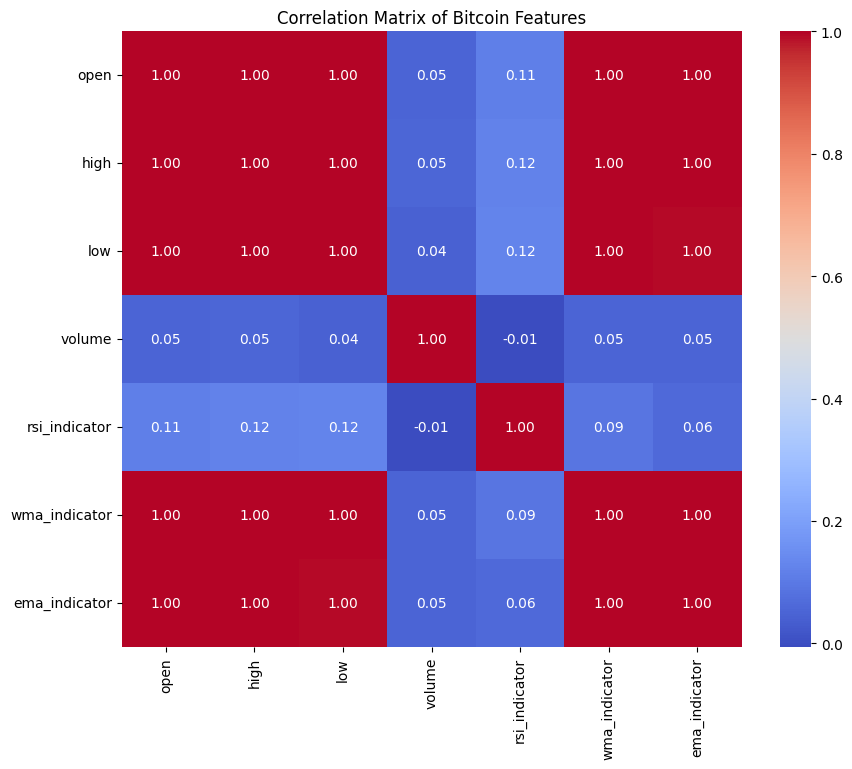

In [111]:
# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bitcoin Features')
plt.show()

In [112]:
chi_scores = chi2(X,y)
chi_scores

(array([ 20174.2413651 ,   2287.92736546,   1270.44756344, 201735.81878723,
           509.53388075,   8155.38624258,   9384.13893882]),
 array([0.00000000e+000, 0.00000000e+000, 2.98839046e-278, 0.00000000e+000,
        8.00993437e-113, 0.00000000e+000, 0.00000000e+000]))

In [113]:
# Apply SelectKBest class to extract top 5 best features
#Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 
#removes all but the highest scoring features

best_features = SelectKBest(score_func=chi2, k=5)
fit = best_features.fit(X, y)

# Display scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concatenate dataframes for better visualization
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print(feature_scores.nlargest(5, 'Score'))

         Feature          Score
3         volume  201735.818787
0           open   20174.241365
6  ema_indicator    9384.138939
5  wma_indicator    8155.386243
1           high    2287.927365


In [114]:
# Model to use for feature selection
#a forest of trees to evaluate the importance of features on an artificial classification task
model = RandomForestClassifier()
model.fit(X, y)

# Display feature importance
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False).head(10))

         Feature  Importance
4  rsi_indicator    0.189555
0           open    0.176661
3         volume    0.139418
2            low    0.129797
1           high    0.125966
6  ema_indicator    0.121547
5  wma_indicator    0.117056


Desenvolver modelos tradicionais- SVM e RF

In [115]:
# SVM Model
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
y_train_pred_svm = svm.predict(X_train)
y_test_pred_svm = svm.predict(X_test)

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
f1_score_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

print("SVM with RFE selected features:")
print(f"Training Accuracy: {train_accuracy_svm}")
print(f"Testing Accuracy: {test_accuracy_svm}")
print(f"F1 Score: {f1_score_svm}")


SVM with RFE selected features:
Training Accuracy: 0.8629563135846798
Testing Accuracy: 0.8744769874476988
F1 Score: 0.8742451727321856


In [116]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
f1_score_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print("\nRandom Forest with selected features:")
print(f"Training Accuracy: {train_accuracy_rf}")
print(f"Testing Accuracy: {test_accuracy_rf}")
print(f"F1 Score: {f1_score_rf}")


Random Forest with selected features:
Training Accuracy: 1.0
Testing Accuracy: 0.6345885634588564
F1 Score: 0.6337162246773972


Agora testar com feature selection

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_RF_Train= X_train.drop(['wma_indicator','low','high'],axis=1)
X_RF_Test= X_test.drop(['wma_indicator','low','high'],axis=1)

In [118]:
# SVM Model
svm = SVC(kernel="linear")
svm.fit(X_RF_Train, y_train)
y_train_pred_svm = svm.predict(X_RF_Train)
y_test_pred_svm = svm.predict(X_RF_Test)

train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)
f1_score_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

print("SVM with RFE selected features:")
print(f"Training Accuracy: {train_accuracy_svm}")
print(f"Testing Accuracy: {test_accuracy_svm}")
print(f"F1 Score: {f1_score_svm}")

SVM with RFE selected features:
Training Accuracy: 0.6606822262118492
Testing Accuracy: 0.6820083682008368
F1 Score: 0.682068992237714


In [119]:

rf = RandomForestClassifier()
rf.fit(X_RF_Train, y_train)
y_train_pred_rf = rf.predict(X_RF_Train)
y_test_pred_rf = rf.predict(X_RF_Test)

train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
f1_score_rf = f1_score(y_test, y_test_pred_rf, average='weighted')

print("\nRandom Forest with selected features:")
print(f"Training Accuracy: {train_accuracy_rf}")
print(f"Testing Accuracy: {test_accuracy_rf}")
print(f"F1 Score: {f1_score_rf}")


Random Forest with selected features:
Training Accuracy: 1.0
Testing Accuracy: 0.6415620641562064
F1 Score: 0.6404321875415615


In [121]:
print("Before split:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


Before split:
X shape: (2388, 7)
y shape: (2388,)


In [120]:
# GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Debugging step: Check sizes before split
print("Before split:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# Random Forest with GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_RF_Train, y_train)

# Best parameters
best_rf = grid_search.best_estimator_

# Train and evaluate the best model
best_rf.fit(X_RF_Train, y_train)
y_train_pred = best_rf.predict(X_RF_Train)
y_test_pred = best_rf.predict(X_RF_Train)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"F1 Score: {f1}")

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\Vasco\PycharmProjects\BiocoinBG\.venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
178 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vasco\PycharmProjects\BiocoinBG\.venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vasco\PycharmProjects\BiocoinBG\.venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Vasco\PycharmProjects\BiocoinBG\.venv\lib\site-packages\sklearn\base.py", line 666, in _validate_p

ValueError: Found input variables with inconsistent numbers of samples: [717, 1671]

Desenvolver LSTM

batchmodel chama o modelo, e depois guarda no hdsfs
no streaming 
o producer gera mensagens no kafka
correr o batch, ele fica á escuta, e depois corres o streammodel
fica a escuta no kafka_topic
no config tem tudo configurado
topico entrada e saida
um producer dedicado kron vai buscar valor
o streaming á escuta da API, ou se não quisermos utilizar um faker


Criar modelos para time frame 1 year